4.[**30 points**] **Semi-supervised EM**

(a) 
\begin{align*}
l_{semi-sup}(\theta^{(t+1)}) &\ge \sum_{i=1}^m(\sum_{z^{(i)}}Q_i^{(t)}(z^{(i)})\log{\frac{p(x^{(i),z^{(i)};\theta^{(t+1)}})}{Q_i^{(t)}(z^{(i)})}})+\alpha(\sum_{i=1}^{\tilde{m}}\log{p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t+1)})})\\
                             &\ge \sum_{i=1}^m(\sum_{z^{(i)}}Q_i^{(t)}(z^{(i)})\log{\frac{p(x^{(i),z^{(i)};\theta^{(t)}})}{Q_i^{(t)}(z^{(i)})}})+\alpha(\sum_{i=1}^{\tilde{m}}\log{p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t)})})\\
                             &= l_{semi-sup}(\theta^{(t)})
\end{align*}

The first inequality holds since 
\begin{align*}
  l_{semi-sup}(\theta) \ge \sum_{i=1}^m\left( \sum_{z^{(i)}} Q_i(z^{(i)}) \log \frac{ p(x^{(i)}, z^{(i)};\theta) }{ Q_i(z^{(i)})}\right)  + \alpha \left(\sum_{i=1}^{\tilde{m}} \log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta)\right)
\end{align*}
choose $Q_i(z^{(i)})=Q_i^{(t)}(z^{(i)})$ and $\theta = \theta^{(t+1)}$.

The second inequality holds since 
\begin{equation*}
  \theta^{(t+1)} := \arg\max_\theta\left[ \sum_{i=1}^m\left( \sum_{z^{(i)}} Q^{(t)}_i(z^{(i)}) \log \frac{ p(x^{(i)}, z^{(i)};\theta) }{ Q^{(t)}_i(z^{(i)})}\right)  + \alpha \left(\sum_{i=1}^{\tilde{m}} \log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta)\right)\right]
\end{equation*}

(b) Latent variables: $z^{(i)}$. We want to update $w^{(i)}_j\triangleq Q_i(z^{(i)}=j)$
\begin{align*}
w^{(i)}_j &:= p(z^{(i)}|x^{(i)}|\phi,\mu.\Sigma) \\
          &= \frac{p(x^{(i)}|z^{(i)};\mu_j,\Sigma_j)p(z^{(i)}=j;\phi)}{\sum_{j=1}^k p(x^{(i)}|z^{(i)};\mu_j,\Sigma_j)p(z^{(i)}=j;\phi)} \\
          &= \frac{\frac{1}{(2\pi)^{n/2}|\Sigma_j|^{1/2}}\exp{(-\frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j))}\phi_j}{\sum_{j=1}^k \frac{1}{(2\pi)^{n/2}|\Sigma_j|^{1/2}}\exp{(-\frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j))}\phi_j}
\end{align*}


(c) Parameters: $\phi,\mu,\Sigma$.

\textbf{First}, we consider $\phi$:
\begin{align*}
\mathcal{L}(\phi,\beta) &= \sum_{i=1}^m \sum_{j=1}^k w^{(i)}_j \log{\phi_j} + \alpha \sum_{i=1}^{\tilde{m}}\sum_{j=1}^k 1\{\tilde{z}^{(i)}=j\} \log{\phi_j} - \beta(\sum_{j=1}^k \phi_j-1)\\
\end{align*}
Take derivative and set to 0:
\begin{align*}
  \left\{
    \begin{array}{ll}
      \frac{\partial \mathcal{L}(\phi,\beta)}{\partial \phi_l} &=  \sum_{i=1}^m  \frac{w^{(i)}_l}{\phi_l} + \alpha \sum_{i=1}^{\tilde{m}} 1\{\tilde{z}^{(i)}=l\} \frac{1}{\phi_l} - \beta = 0\\
      \frac{\partial \mathcal{L}(\phi,\beta)}{\partial \beta} &= \sum_{j=1}^k \phi_j -1 =0 
    \end{array}
\right.
\end{align*}
Then we get the expression of $\phi_l$ and plug it back to second equation:
\begin{align*}
& \phi_l = \frac{\sum_{i=1}^m  w^{(i)}_l + \alpha \sum_{i=1}^{\tilde{m}} 1\{\tilde{z}^{(i)}=l\}} {\beta}\\
\Longrightarrow \ & \sum_{l=1}^k \phi_l -1 = \sum_{l=1}^k \frac{\sum_{i=1}^m  w^{(i)}_l + \alpha \sum_{i=1}^{\tilde{m}} 1\{\tilde{z}^{(i)}=l\}} {\beta} = \frac{m+\alpha\tilde{m}}{\beta}-1=0 \\
\Longrightarrow \ & \beta = m+\alpha\tilde{m}
\end{align*}
As a result,
\begin{equation*}
  \phi_l = \frac{\sum_{i=1}^m  w^{(i)}_l + \alpha \sum_{i=1}^{\tilde{m}} 1\{\tilde{z}^{(i)}=l\}} {m+\alpha\tilde{m}}
\end{equation*}

\textbf{Second}, we consider $\mu$:
\begin{align*}
\mathcal{L}(\mu) &= -\sum_{i=1}^m \sum_{j=1}^k w^{(i)}_j \frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j)-\alpha \sum_{i=1}^{\tilde{m}}\sum_{j=1}^k 1\{ \tilde{z}^{(i)}=j\} \frac{1}{2}(\tilde{x}^{(i)}-\mu_j)^T\Sigma_j^{-1}(\tilde{x}^{(i)}-\mu_j) \\
\end{align*}
Take derivative and set to 0:
\begin{align*}
& \frac{\partial \mathcal{L}(\mu)}{\partial \mu_l} = \sum_{i=1}^m w^{(i)}_l \Sigma^{-1}(x^{(i)}-\mu_l)+\alpha \sum_{i=1}^{\tilde{m}} 1\{ \tilde{z}^{(i)}=l\} \Sigma^{-1}({\tilde{x}}^{(i)}-\mu_l) = 0 \\
\Longrightarrow \ & \mu_l = \frac{\sum_{i=1}^m w^{(i)}_l x^{(i)}+\alpha \sum_{i=1}^{\tilde{m}} 1\{ \tilde{z}^{(i)}=l\} {\tilde{x}}^{(i)} }{\sum_{i=1}^m w^{(i)}_l+\alpha\sum_{i=1}^{\tilde{m}} 1\{ \tilde{z}^{(i)}=l\}}
\end{align*}

\textbf{Third}, we consider $\Sigma$:
\begin{align*}
\mathcal{L}(\Sigma) &= -\sum_{i=1}^m \sum_{j=1}^k w^{(i)}_j \left[\frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j)+\log{|\Sigma|}\right]  \\
                    & \qquad -\alpha \sum_{i=1}^{\tilde{m}}\sum_{j=1}^k 1\{ \tilde{z}^{(i)}=j\} \left[\frac{1}{2}(\tilde{x}^{(i)}-\mu_j)^T\Sigma_j^{-1}(\tilde{x}^{(i)}-\mu_j)+\log{|\Sigma|}\right]
\end{align*}
Take derivative and set to 0:
\begin{align*}
\frac{\partial \mathcal{L}(\Sigma)}{\partial \Sigma_l} & = -\frac{1}{2}\sum_{i=1}^m w^{(i)}_l \Sigma^{-1} + \frac{1}{2}\Sigma^{-1}\left(\sum_{i=1}^m w^{(i)}_l (x^{(i)}-\mu_l)(x^{(i)}-\mu_l)^T\right)\Sigma^{-1} \\
& \qquad -\frac{1}{2}\alpha\sum_{i=1}^{\tilde{m}} 1\{ \tilde{z}^{(i)}=l\} \Sigma^{-1} + \frac{1}{2}\alpha\Sigma^{-1}\left(\sum_{i=1}^{\tilde{m}} 1\{ \tilde{z}^{(i)}=l\} (\tilde{x}^{(i)}-\mu_l)(\tilde{x}^{(i)}-\mu_l)^T\right)\Sigma^{-1} \\
&= -\frac{1}{2}\Sigma^{-1} \left(\sum_{i=1}^m w^{(i)}_l +\alpha\sum_{i=1}^{\tilde{m}} 1\{ \tilde{z}^{(i)}=l\} \right) \\
& \qquad + \frac{1}{2}\Sigma^{-1}\left(\sum_{i=1}^m w^{(i)}_l (x^{(i)}-\mu_l)(x^{(i)}-\mu_l)^T+\alpha\sum_{i=1}^{\tilde{m}} 1\{ \tilde{z}^{(i)}=l\} (\tilde{x}^{(i)}-\mu_l)(\tilde{x}^{(i)}-\mu_l)^T\right)\Sigma^{-1} \\
&=0
\end{align*}
As a result, 
\begin{align*}
\Sigma_l = \frac{\sum_{i=1}^m w^{(i)}_l (x^{(i)}-\mu_l)(x^{(i)}-\mu_l)^T+\alpha\sum_{i=1}^{\tilde{m}} 1\{ \tilde{z}^{(i)}=l\} (\tilde{x}^{(i)}-\mu_l)(\tilde{x}^{(i)}-\mu_l)^T}{\sum_{i=1}^m w^{(i)}_l +\alpha\sum_{i=1}^{\tilde{m}} 1\{ \tilde{z}^{(i)}=l\}}
\end{align*}
\textbf{Note.} 
\begin{align*}
&0 = I' = (\Sigma\Sigma^{-1})' = \Sigma'\Sigma^{-1}+\Sigma(\Sigma^{-1})' \\
\Longrightarrow \ & (\Sigma^{-1})' = -\Sigma^{-1}\Sigma'\Sigma^{-1}
\end{align*}

(d)(e)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

PLOT_COLORS = ['red', 'green', 'blue', 'orange']  # Colors for your plots
K = 4           # Number of Gaussians in the mixture model
NUM_TRIALS = 3  # Number of trials to run (can be adjusted for debugging)
UNLABELED = -1  # Cluster label for unlabeled data points (do not change)


def main(is_semi_supervised, trial_num):
    """Problem 3: EM for Gaussian Mixture Models (unsupervised and semi-supervised)"""
    print('Running {} EM algorithm...'
          .format('semi-supervised' if is_semi_supervised else 'unsupervised'))

    # Load dataset
    train_path = os.path.join('data', 'ds4_train.csv')
    x_all, z_all = load_gmm_dataset(train_path)

    # Split into labeled and unlabeled examples
    labeled_idxs = (z_all != UNLABELED).squeeze()
    x_tilde = x_all[labeled_idxs, :]   # Labeled examples
    z_tilde = z_all[labeled_idxs, :]   # Corresponding labels
    x = x_all[~labeled_idxs, :]        # Unlabeled examples

    # *** START CODE HERE ***
    # (1) Initialize mu and sigma by splitting the m data points uniformly at random
    # into K groups, then calculating the sample mean and covariance for each group

    m = x.shape[0]
    index = np.arange(0, m)
    np.random.shuffle(index)
    K_array = np.split(x[index,:],K,axis=0)
    mu = [np.mean(arr,axis=0) for arr in K_array]
    sigma = [(arr-mu_j).T @ (arr-mu_j) / arr.shape[0] for arr,mu_j in zip(K_array,mu)]

    # (2) Initialize phi to place equal probability on each Gaussian
    # phi should be a numpy array of shape (K,)
    phi = np.ones((K,1)) / K

    # (3) Initialize the w values to place equal probability on each Gaussian
    # w should be a numpy array of shape (m, K)
    
    w = np.ones((m,K))/K
    # raise ZeroDivisionError()
    # *** END CODE HERE ***

    if is_semi_supervised:
        w = run_semi_supervised_em(x, x_tilde, z_tilde, w, phi, mu, sigma)
    else:
        w = run_em(x, w, phi, mu, sigma)

    # Plot your predictions
    z_pred = np.zeros(m)
    if w is not None:  # Just a placeholder for the starter code
        for i in range(m):
            z_pred[i] = np.argmax(w[i])

    plot_gmm_preds(x, z_pred, is_semi_supervised, plot_id=trial_num)


def run_em(x, w, phi, mu, sigma):
    """Problem 3(d): EM Algorithm (unsupervised).

    See inline comments for instructions.

    Args:
        x: Design matrix of shape (n, d).
        w: Initial weight matrix of shape (n, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (d,).
        sigma: Initial cluster covariances, list of k arrays of shape (d, d).

    Returns:
        Updated weight matrix of shape (n, d) resulting from EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    eps = 1e-3  # Convergence threshold
    max_iter = 1000

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        # pass  # Just a placeholder for the starter code
        # *** START CODE HERE

        # (1) E-step: Update your estimates in w
        for i in range(K):
            w[:,i] = np.exp(-1/2*np.sum((x-mu[i]) @ np.linalg.inv(sigma[i]) * (x-mu[i]),axis=1)) * phi[i]/ (np.linalg.det(sigma[i])**0.5)
        w /= np.sum(w,axis=1).reshape((-1,1))
        # (2) M-step: Update the model parameters phi, mu, and sigma
        phi = np.mean(w,axis=1)
        for l in range(K):
            mu[l] =  x.T @ w[:,l] / (np.sum(w[:,l]))
            sigma[l] = (w[:,l].reshape((-1,1))*(x-mu[l])).T @ (x-mu[l]) / (np.sum(w[:,l]))

        # (3) Compute the log-likelihood of the data to check for convergence.
        prev_ll = ll
        p_x_z = np.ones(w.shape)
        for i in range(K):
            p_x_z[:,i] = np.exp(-1/2*np.sum((x-mu[i]) @ np.linalg.inv(sigma[i]) * (x-mu[i]),axis=1)) * phi[i]/ (np.linalg.det(sigma[i])**0.5)
        ll = np.sum(np.log(np.sum(p_x_z,axis=1)))
        # By log-likelihood, we mean `ll = sum_x[log(sum_z[p(x|z) * p(z)])]`.
        # We define convergence by the first iteration where abs(ll - prev_ll) < eps.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        it += 1
        # *** END CODE HERE ***
    print(f'Number of iterations:{it}')

    return w


def run_semi_supervised_em(x, x_tilde, z_tilde, w, phi, mu, sigma):
    """Problem 3(e): Semi-Supervised EM Algorithm.

    See inline comments for instructions.

    Args:
        x: Design matrix of unlabeled examples of shape (n, d).
        x_tilde: Design matrix of labeled examples of shape (n_tilde, d).
        z_tilde: Array of labels of shape (n_tilde, 1).
        w: Initial weight matrix of shape (n, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (d,).
        sigma: Initial cluster covariances, list of k arrays of shape (d, d).

    Returns:
        Updated weight matrix of shape (n, d) resulting from semi-supervised EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    alpha = 20.  # Weight for the labeled examples
    eps = 1e-3   # Convergence threshold
    max_iter = 1000

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        # pass  # Just a placeholder for the starter code
        # *** START CODE HERE ***
        # (1) E-step: Update your estimates in w
        for i in range(K):
            w[:,i] = np.exp(-1/2*np.sum((x-mu[i]) @ np.linalg.inv(sigma[i]) * (x-mu[i]),axis=1)) * phi[i]/ (np.linalg.det(sigma[i])**0.5)
        w /= np.sum(w,axis=1).reshape((-1,1))

        # (2) M-step: Update the model parameters phi, mu, and sigma
        for l in range(K):
            phi[l] = (np.sum(w[:,l]) + alpha * np.sum(z_tilde == l) ) / (w.shape[0]+alpha*z_tilde.shape[0])
            mu[l] =  (x.T @ w[:,l] + alpha*np.sum(x_tilde[z_tilde.reshape(-1,)==l],axis=0)) / (np.sum(w[:,l])+alpha*np.sum(z_tilde == l))
            sigma[l] = ((w[:,l].reshape((-1,1))*(x-mu[l])).T @ (x-mu[l]) + alpha*(x_tilde[z_tilde.reshape(-1,)==l]-mu[l]).T @ (x_tilde[z_tilde.reshape(-1,)==l]-mu[l]))/ (np.sum(w[:,l])+alpha*np.sum(z_tilde == l))

        # (3) Compute the log-likelihood of the data to check for convergence.
        prev_ll = ll
        p_x_z = np.ones(w.shape)
        p_xtilde_ztilde = 0
        for i in range(K):
            p_x_z[:,i] = np.exp(-1/2*np.sum((x-mu[i]) @ np.linalg.inv(sigma[i]) * (x-mu[i]),axis=1)) * phi[i]/ (np.linalg.det(sigma[i])**0.5)
            p_xtilde_ztilde += np.sum(-1/2*np.sum((x_tilde[z_tilde.reshape(-1,)==l]-mu[i]) @ np.linalg.inv(sigma[i]) * (x_tilde[z_tilde.reshape(-1,)==l]-mu[i]),axis=1) -np.log(np.linalg.det(sigma[i])**0.5))
        ll = np.sum(np.log(np.sum(p_x_z,axis=1))) + alpha*p_xtilde_ztilde#np.sum(np.log(np.sum(p_xtilde_ztilde,axis=1)))
        # Hint: Make sure to include alpha in your calculation of ll.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        it += 1
        # *** END CODE HERE ***
    print(f'Number of iterations:{it}')
    return w


# *** START CODE HERE ***
# Helper functions
# *** END CODE HERE ***


def plot_gmm_preds(x, z, with_supervision, plot_id):
    """Plot GMM predictions on a 2D dataset `x` with labels `z`.

    Write to the output directory, including `plot_id`
    in the name, and appending 'ss' if the GMM had supervision.

    NOTE: You do not need to edit this function.
    """
    plt.figure(figsize=(12, 8))
    plt.title('{} GMM Predictions No.{}'.format('Semi-supervised' if with_supervision else 'Unsupervised',plot_id))
    plt.xlabel('x_1')
    plt.ylabel('x_2')

    for x_1, x_2, z_ in zip(x[:, 0], x[:, 1], z):
        color = 'gray' if z_ < 0 else PLOT_COLORS[int(z_)]
        alpha = 0.25 if z_ < 0 else 0.75
        plt.scatter(x_1, x_2, marker='.', c=color, alpha=alpha)
    plt.show()


def load_gmm_dataset(csv_path):
    """Load dataset for Gaussian Mixture Model.

    Args:
         csv_path: Path to CSV file containing dataset.

    Returns:
        x: NumPy array shape (n_examples, dim)
        z: NumPy array shape (n_exampls, 1)

    NOTE: You do not need to edit this function.
    """

    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    z_cols = [i for i in range(len(headers)) if headers[i] == 'z']

    x = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols, dtype=float)
    z = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=z_cols, dtype=float)

    if z.ndim == 1:
        z = np.expand_dims(z, axis=-1)

    return x, z

Run `main` for (d):

Running unsupervised EM algorithm...
Number of iterations:153


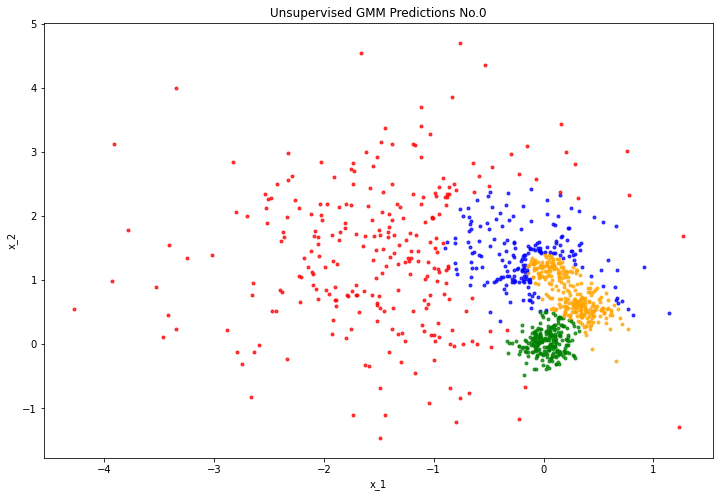

Running unsupervised EM algorithm...
Number of iterations:105


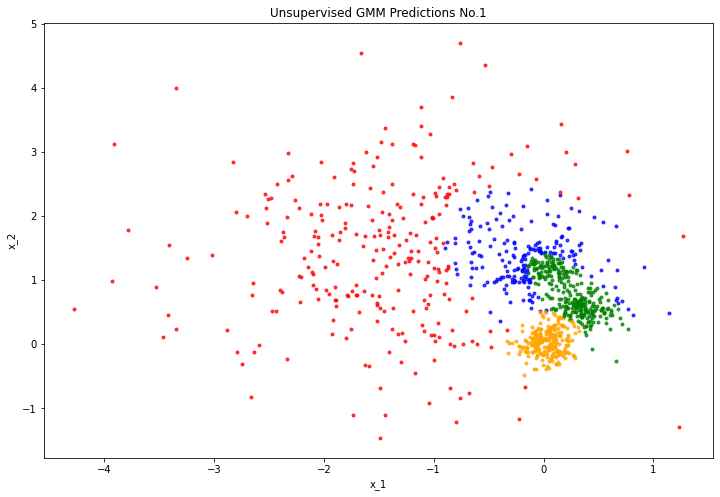

Running unsupervised EM algorithm...
Number of iterations:126


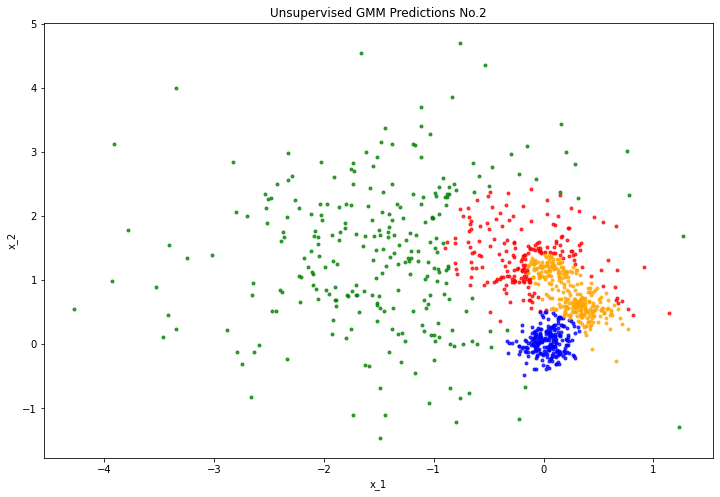

In [2]:
np.random.seed(229)
# Run NUM_TRIALS trials to see how different initializations
# affect the final predictions with and without supervision
for t in range(NUM_TRIALS):
    main(is_semi_supervised=False, trial_num=t)

Run `main` for (e):

Running semi-supervised EM algorithm...
Number of iterations:39


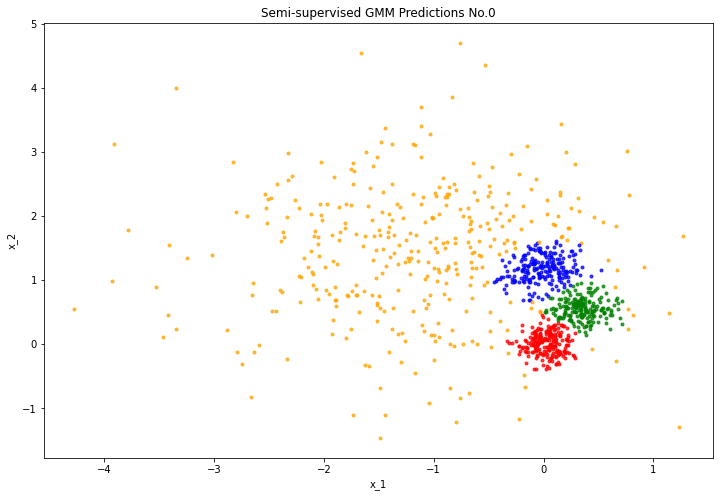

Running semi-supervised EM algorithm...
Number of iterations:46


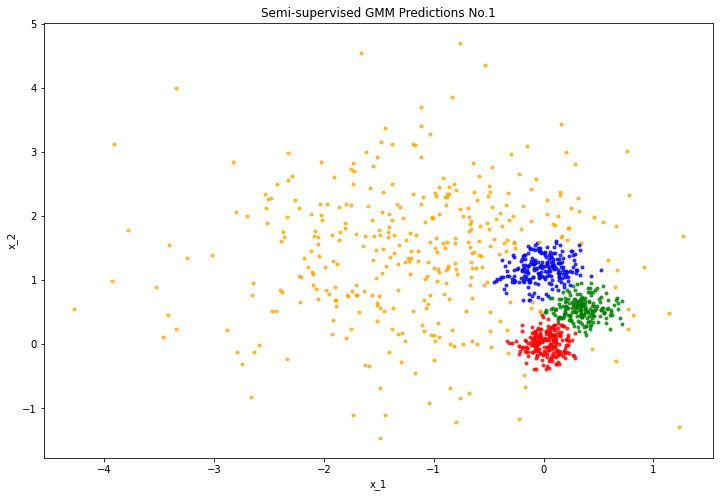

Running semi-supervised EM algorithm...
Number of iterations:43


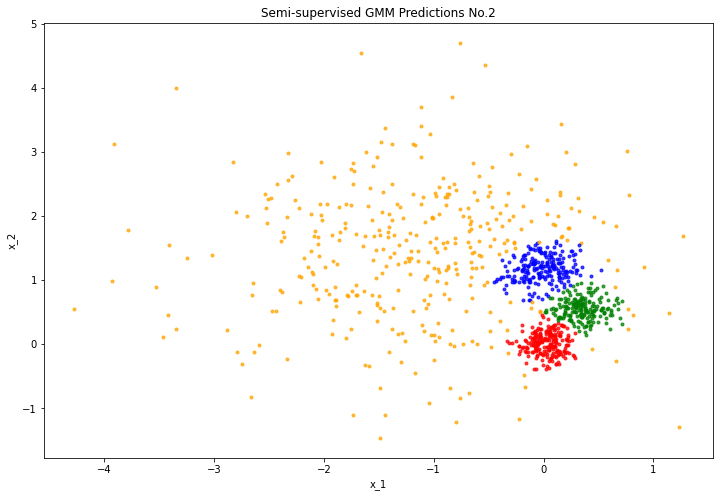

In [3]:
np.random.seed(229)
# Run NUM_TRIALS trials to see how different initializations
# affect the final predictions with and without supervision
for t in range(NUM_TRIALS):
    main(is_semi_supervised=True, trial_num=t)